In [11]:
%matplotlib notebook
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as m3d
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_excel('../data/result_v2.xlsx')

In [13]:
R = list(df['R'])
G = list(df['G'])
B = list(df['B'])
color = list(df['HexCodes'])
size = [i/800 for i in list(df['Skin Tones Covered Per Product'])]

In [14]:
x = df['R'].astype('float64')
y = df['G'].astype('float64')
z = df['B'].astype('float64')
type(x)

pandas.core.series.Series

<IPython.core.display.Javascript object>


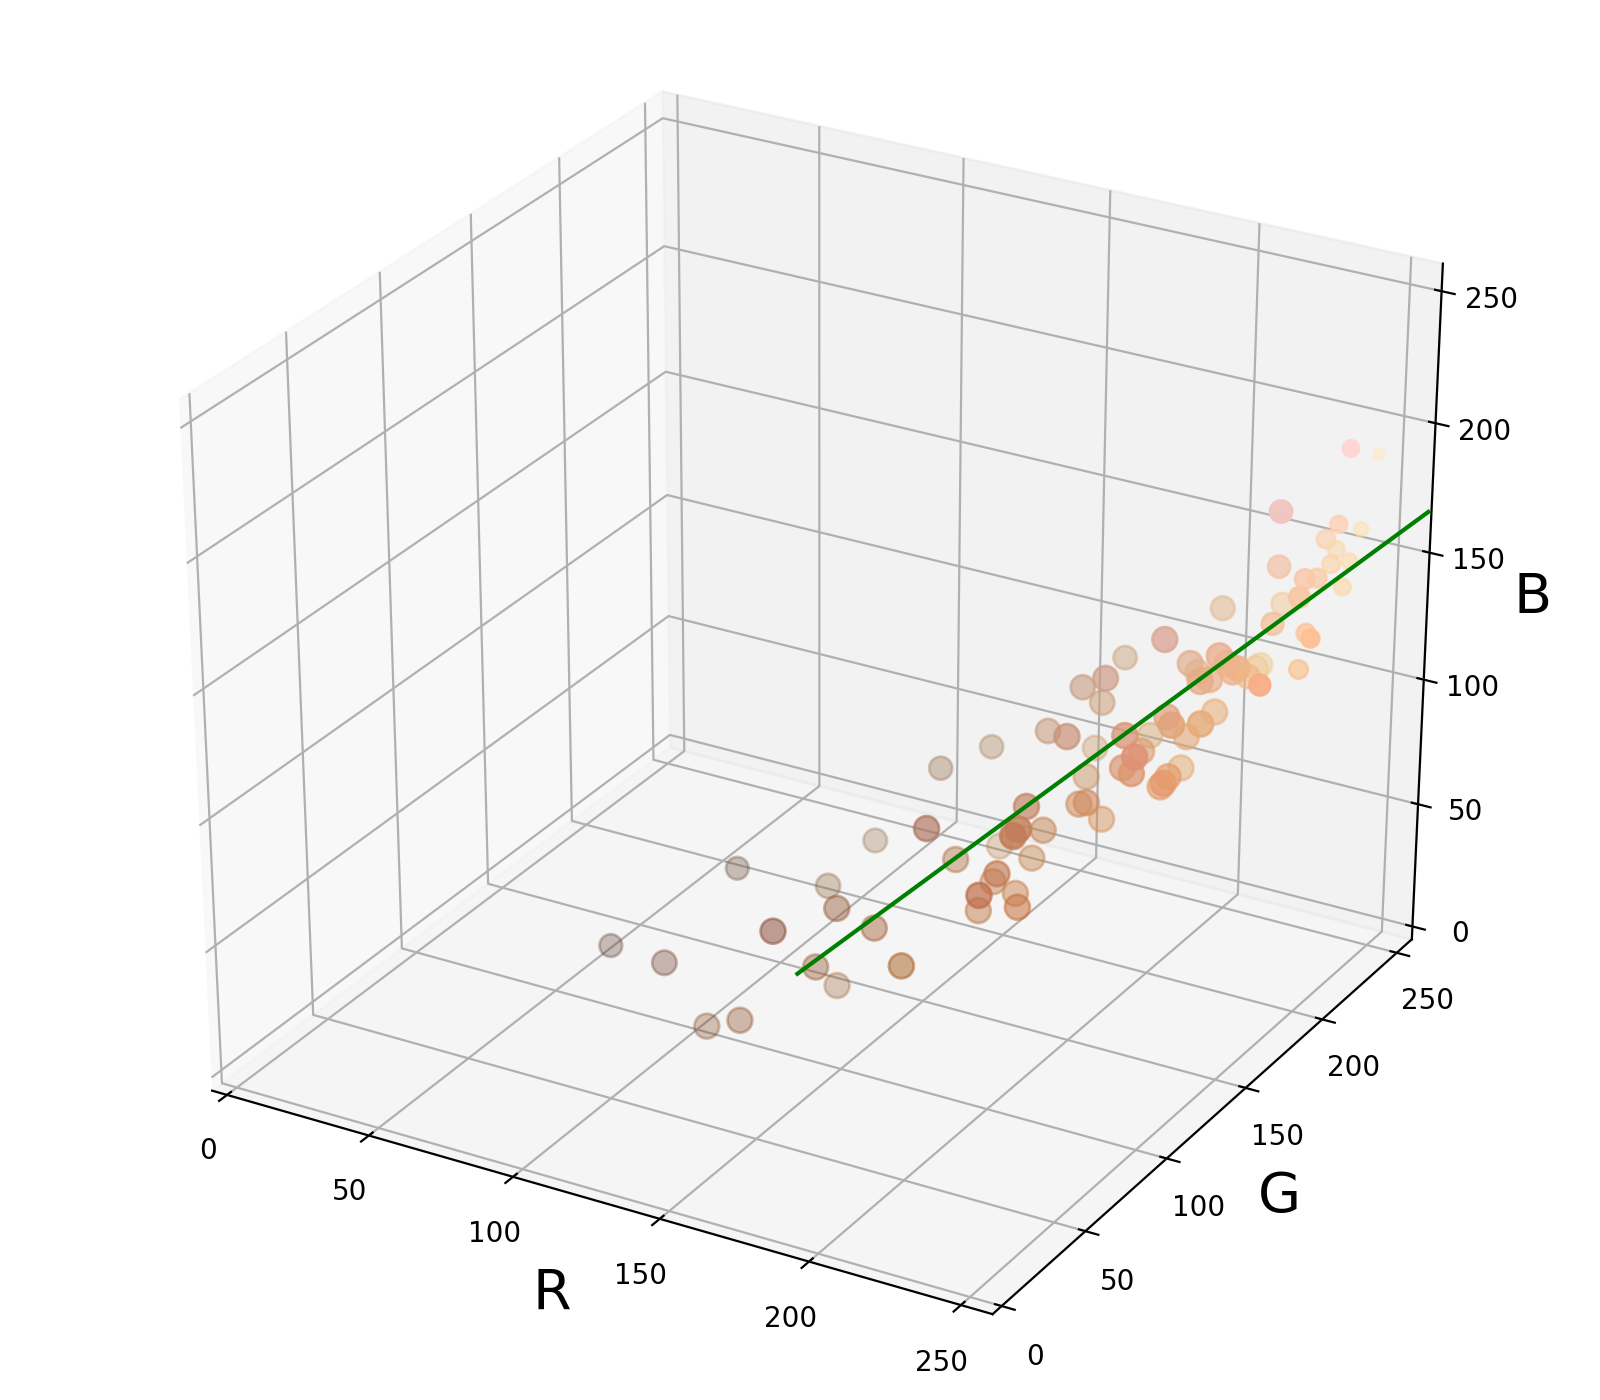

In [16]:
data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data += np.random.normal(size=data.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-122:120:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

ax = m3d.Axes3D(plt.figure(figsize = (8, 7)))
ax.scatter3D(x, y, z, c = color, s = size, depthshade=True)
ax.plot3D(*linepts.T, c = 'g')
ax.set_xlim3d(0,255)
ax.set_ylim3d(0,255)
ax.set_zlim3d(0,255)

ax.set_xlabel('R', fontsize = 20)
ax.set_ylabel('G', fontsize = 20)
ax.set_zlabel('B', fontsize = 20)
plt.show()

In [181]:
import statsmodels.api as sm # import statsmodels 
df1 = df[df['Color Group'] == 'Light']
X = df1[['G', 'B']]
y = df1['R']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4245.
Date:                Mon, 21 May 2018   Prob (F-statistic):           1.58e-37
Time:                        14:57:24   Log-Likelihood:                -131.29
No. Observations:                  32   AIC:                             266.6
Df Residuals:                      30   BIC:                             269.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              1.4922      0.160      9.346      0.000       1.166       1.818
B             -0.3066      0.200     -1.533      0.136      -0.715       0.102
==============================================================================
Omnibus:                        0.497   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.542
Skew:                          -0.264   Prob(JB):                        0.763
Kurtosis:                       2.642   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
plt.savefig('../image/foo4.png')